# First load and plot profile data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw = pd.read_csv("6MV 100FSD PROFILE (PDD JUNE - RAW).csv") # , index_col=[0]

In [3]:
raw.loc[:7]   # first 10

,0,1,2,3,4,5,6
0,Scan Type:,Crossline,Crossline,Crossline,Inline,Inline,Inline
1,Radiation Type:,Photons,Photons,Photons,Photons,Photons,Photons
2,Energy:,6 MV,6 MV,6 MV,6 MV,6 MV,6 MV
3,Fieldsize:,60 x 60 mm,60 x 60 mm,60 x 60 mm,60 x 60 mm,60 x 60 mm,60 x 60 mm
4,Depth:,15.0 mm,100.0 mm,350.0 mm,15.0 mm,100.0 mm,350.0 mm
5,NaN,Color [MediumVioletRed],Color [Orange],Color [DeepPink],Color [SlateBlue],Color [Teal],Color [Blue]
6,Coordinate [mm]:,NaN,NaN,NaN,NaN,NaN,NaN
7,-90,NaN,NaN,1.3,NaN,NaN,1.3


## Get the info
0 column is info, 1: are the data, each col being another spectra

In [4]:
info_df = raw.loc[:4]
info_df

,0,1,2,3,4,5,6
0,Scan Type:,Crossline,Crossline,Crossline,Inline,Inline,Inline
1,Radiation Type:,Photons,Photons,Photons,Photons,Photons,Photons
2,Energy:,6 MV,6 MV,6 MV,6 MV,6 MV,6 MV
3,Fieldsize:,60 x 60 mm,60 x 60 mm,60 x 60 mm,60 x 60 mm,60 x 60 mm,60 x 60 mm
4,Depth:,15.0 mm,100.0 mm,350.0 mm,15.0 mm,100.0 mm,350.0 mm


Get the info strings and clean

In [5]:
description = info_df['0'].tolist()
print(description)
description2 = [description[i].split(":")[0].replace(" ", "") for i in range(len(description))]  # remove : and strip whitespaces
description2

['Scan Type:', 'Radiation Type:', 'Energy:', 'Fieldsize:', 'Depth:']


['ScanType', 'RadiationType', 'Energy', 'Fieldsize', 'Depth']

In [6]:
info_df = info_df.drop('0', 1)   # drop the now refunct 0 column

In [7]:
ID_list = [':'.join(info_df[i].tolist()) for i in list(info_df.columns)]  # iterate over columns, joining entries by : and creating a list
ID_list

['Crossline:Photons:6 MV:60 x 60 mm:15.0 mm',
 'Crossline:Photons:6 MV:60 x 60 mm:100.0 mm',
 'Crossline:Photons:6 MV:60 x 60 mm:350.0 mm',
 'Inline:Photons:6 MV:60 x 60 mm:15.0 mm',
 'Inline:Photons:6 MV:60 x 60 mm:100.0 mm',
 'Inline:Photons:6 MV:60 x 60 mm:350.0 mm']

In [8]:
info_df = info_df.transpose()  # access methods require selection by keys which should be columns, therefore transpose
info_df.columns = description2
info_df

,ScanType,RadiationType,Energy,Fieldsize,Depth
1,Crossline,Photons,6 MV,60 x 60 mm,15.0 mm
2,Crossline,Photons,6 MV,60 x 60 mm,100.0 mm
3,Crossline,Photons,6 MV,60 x 60 mm,350.0 mm
4,Inline,Photons,6 MV,60 x 60 mm,15.0 mm
5,Inline,Photons,6 MV,60 x 60 mm,100.0 mm
6,Inline,Photons,6 MV,60 x 60 mm,350.0 mm


In [9]:
scan_num = info_df.index.values
len(scan_num)

6

In [10]:
ID_num = [str('Profile' + i) for i in info_df.index.values]
print(ID_num)
info_df['ID_num'] = ID_num  # insert new column

['Profile1', 'Profile2', 'Profile3', 'Profile4', 'Profile5', 'Profile6']


In [11]:
info_df['Description'] = ID_list
info_df

,ScanType,RadiationType,Energy,Fieldsize,Depth,ID_num,Description
1,Crossline,Photons,6 MV,60 x 60 mm,15.0 mm,Profile1,Crossline:Photons:6 MV:60 x 60 mm:15.0 mm
2,Crossline,Photons,6 MV,60 x 60 mm,100.0 mm,Profile2,Crossline:Photons:6 MV:60 x 60 mm:100.0 mm
3,Crossline,Photons,6 MV,60 x 60 mm,350.0 mm,Profile3,Crossline:Photons:6 MV:60 x 60 mm:350.0 mm
4,Inline,Photons,6 MV,60 x 60 mm,15.0 mm,Profile4,Inline:Photons:6 MV:60 x 60 mm:15.0 mm
5,Inline,Photons,6 MV,60 x 60 mm,100.0 mm,Profile5,Inline:Photons:6 MV:60 x 60 mm:100.0 mm
6,Inline,Photons,6 MV,60 x 60 mm,350.0 mm,Profile6,Inline:Photons:6 MV:60 x 60 mm:350.0 mm


In [12]:
to_plot = info_df['Description'][info_df['Depth'] == '15.0 mm']  # get dexcription where...
to_plot = to_plot.tolist()

## Get the numerial profile data

In [13]:
data_df = raw.ix[7:]    # get numerical data from row 7 onwards
data_df=data_df.rename(columns = {'0':'Depth'}).set_index('Depth')  # rename the column and set as index

In [14]:
data_df.columns = ID_list  # set the column names from the ID_list
data_df = data_df.fillna(0).astype(float)  # set NaN to 0 and return floats
data_df.head()

,Crossline:Photons:6 MV:60 x 60 mm:15.0 mm,Crossline:Photons:6 MV:60 x 60 mm:100.0 mm,Crossline:Photons:6 MV:60 x 60 mm:350.0 mm,Inline:Photons:6 MV:60 x 60 mm:15.0 mm,Inline:Photons:6 MV:60 x 60 mm:100.0 mm,Inline:Photons:6 MV:60 x 60 mm:350.0 mm
Depth,,,,,,
-90,0.0,0.0,1.3,0.0,0.0,1.3
-89,0.0,0.0,1.2,0.0,0.0,1.3
-88,0.0,0.0,1.2,0.0,0.0,1.2
-87,0.0,0.0,1.2,0.0,0.0,1.3
-86,0.0,0.0,1.4,0.0,0.0,1.3


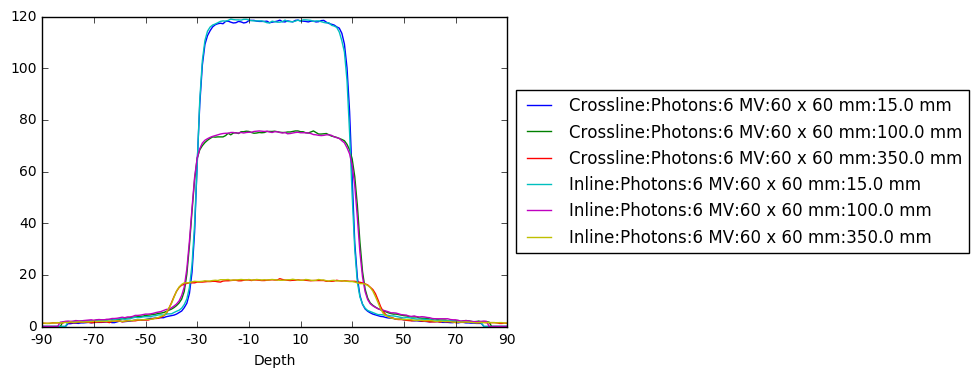

In [15]:
data_df.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5)); # label=field  legend=False, title=col_title

## Filter and plot

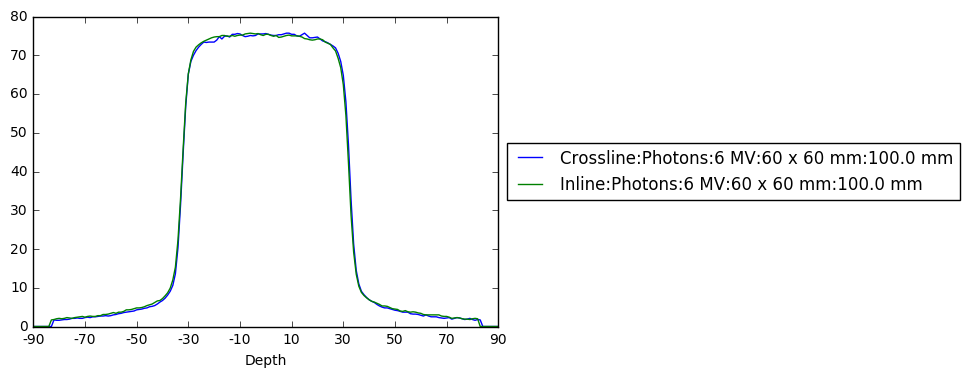

In [16]:
to_plot = info_df['Description'][info_df['Depth'] == '100.0 mm'].tolist()  # get dexcription where...
data_df[to_plot].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5));

Could wrap info df and data df in a class.

Use searches of info to get index of data_df to plot

# Plot PDD data

In [17]:
PDDraw = pd.read_csv("LA6(2015) 6MV 100FSD PDD - RAW.csv") # , index_col=[0]

In [18]:
PDDraw[:10]

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,Scan Type:,Depth Dose,Depth Dose,Depth Dose,Depth Dose,Depth Dose,Depth Dose,Depth Dose,Depth Dose,Depth Dose,...,Depth Dose,Depth Dose,Depth Dose,Depth Dose,Depth Dose,Depth Dose,Depth Dose,Depth Dose,Depth Dose,Depth Dose
1,Radiation Type:,Photons,Photons,Photons,Photons,Photons,Photons,Photons,Photons,Photons,...,Photons,Photons,Photons,Photons,Photons,Photons,Photons,Photons,Photons,Photons
2,Energy:,6 MV,6 MV,6 MV,6 MV,6 MV,6 MV,6 MV,6 MV,6 MV,...,6 MV,6 MV,6 MV,6 MV,6 MV,6 MV,6 MV,6 MV,6 MV,6 MV
3,Fieldsize:,5 x 5 mm,5 x 5 mm,5 x 5 mm,10 x 10 mm,10 x 10 mm,10 x 10 mm,20 x 20 mm,20 x 20 mm,20 x 20 mm,...,120 x 120 mm,140 x 140 mm,140 x 140 mm,140 x 140 mm,220 x 220 mm,220 x 220 mm,220 x 220 mm,300 x 220 mm,300 x 220 mm,300 x 220 mm
4,Depth:,-0.5 mm,-0.5 mm,50.0 mm,-0.5 mm,-0.5 mm,50.0 mm,-0.5 mm,-0.5 mm,50.0 mm,...,50.0 mm,-0.5 mm,-0.5 mm,50.0 mm,-0.5 mm,-0.5 mm,50.0 mm,-0.5 mm,-0.5 mm,50.0 mm
5,NaN,Color [Orange],Color [DeepPink],Color [Teal],Color [Blue],Color [Blue],Color [DeepPink],Color [Gold],Color [ForestGreen],Color [ForestGreen],...,Color [DarkBlue],Color [DarkCyan],Color [DarkTurquoise],Color [DarkMagenta],Color [SlateBlue],Color [DarkGreen],Color [MediumVioletRed],Color [Orange],Color [DarkOrchid],Color [Teal]
6,Coordinate [mm]:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0,69,69,NaN,57.4,57.4,NaN,53.2,53.2,NaN,...,NaN,60.8,60.8,NaN,68.3,68.3,NaN,70.5,70.5,NaN
8,1,68.9,68.9,NaN,57.1,57.1,NaN,53.4,53.4,NaN,...,NaN,60.7,60.7,NaN,68.5,68.5,NaN,70.7,70.7,NaN
9,2,75.7,75.6,NaN,70.9,71,NaN,65.4,65.5,NaN,...,NaN,64.9,64.9,NaN,76.3,76.2,NaN,77,77,NaN


In [19]:
PDDfield = PDDraw.loc[3].tolist()  # get depth row and use as column names
PDDdepth = PDDraw.loc[4].tolist()  # get depth row and use as column names
PDDcol_names = [a + ' : ' + b for a,b in zip(PDDfield,PDDdepth)]  # drop 'Fieldsize: : Depth:',
PDDcol_title = PDDcol_names.pop(0)
#PDDcol_names

In [20]:
PDD = PDDraw.ix[7:]    # get PDD data from row 7 onwards
PDD.columns = PDDdepth  # set the column names
PDD = PDD.set_index('Depth:')  # set index
PDD.columns = PDDcol_names  # set the column names
PDD = PDD.fillna(0).astype(float)  # set NaN to 0 and return floats
PDD.head()

,5 x 5 mm : -0.5 mm,5 x 5 mm : -0.5 mm,5 x 5 mm : 50.0 mm,10 x 10 mm : -0.5 mm,10 x 10 mm : -0.5 mm,10 x 10 mm : 50.0 mm,20 x 20 mm : -0.5 mm,20 x 20 mm : -0.5 mm,20 x 20 mm : 50.0 mm,30 x 30 mm : -0.5 mm,...,120 x 120 mm : 50.0 mm,140 x 140 mm : -0.5 mm,140 x 140 mm : -0.5 mm,140 x 140 mm : 50.0 mm,220 x 220 mm : -0.5 mm,220 x 220 mm : -0.5 mm,220 x 220 mm : 50.0 mm,300 x 220 mm : -0.5 mm,300 x 220 mm : -0.5 mm,300 x 220 mm : 50.0 mm
Depth:,,,,,,,,,,,,,,,,,,,,,
0,69.0,69.0,0.0,57.4,57.4,0.0,53.2,53.2,0.0,53.2,...,0.0,60.8,60.8,0.0,68.3,68.3,0.0,70.5,70.5,0.0
1,68.9,68.9,0.0,57.1,57.1,0.0,53.4,53.4,0.0,53.5,...,0.0,60.7,60.7,0.0,68.5,68.5,0.0,70.7,70.7,0.0
2,75.7,75.6,0.0,70.9,71.0,0.0,65.4,65.5,0.0,64.7,...,0.0,64.9,64.9,0.0,76.3,76.2,0.0,77.0,77.0,0.0
3,101.7,101.8,0.0,87.3,87.3,0.0,80.7,80.7,0.0,79.7,...,0.0,82.4,82.4,0.0,87.5,87.5,0.0,88.8,88.8,0.0
4,113.0,113.0,0.0,99.1,99.1,0.0,91.8,91.8,0.0,90.3,...,0.0,91.7,91.6,0.0,95.4,95.4,0.0,96.3,96.3,0.0


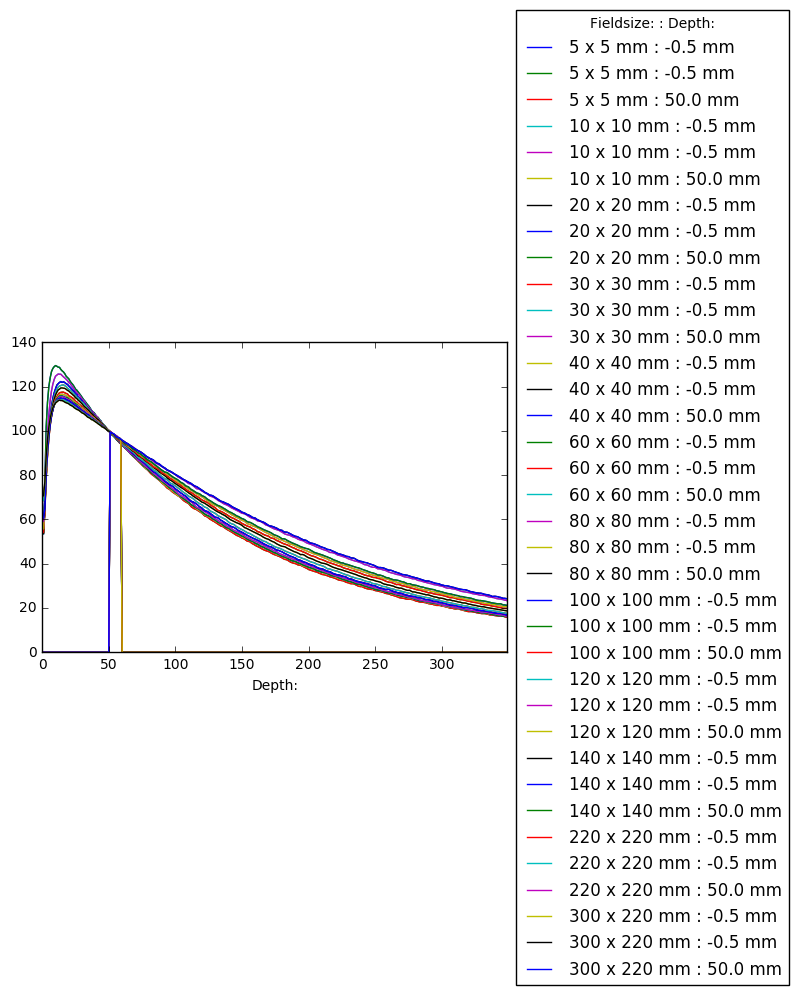

In [21]:
PDD.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5), title=PDDcol_title); # label=field  legend=False